In [19]:
import matplotlib.pyplot as plt
import pandas as pd


In [20]:
df = pd.read_csv('csv_data.csv')

In [21]:
df.head()

,Unnamed: 0,note,velocity,duration
0,0,71,127,2
1,1,66,127,0
2,2,70,127,0
3,3,65,127,0
4,4,71,127,0


In [22]:
del df['Unnamed: 0']
print(df.describe())


               note      velocity      duration
count  2.052505e+07  2.052505e+07  2.052505e+07
mean   5.439137e+01  6.956317e+01  5.382391e-01
std    1.577485e+01  5.203925e+01  1.361634e+00
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    4.200000e+01  0.000000e+00  0.000000e+00
50%    5.300000e+01  1.000000e+02  0.000000e+00
75%    6.700000e+01  1.100000e+02  1.000000e+00
max    1.270000e+02  1.270000e+02  2.930000e+02


<Axes: >

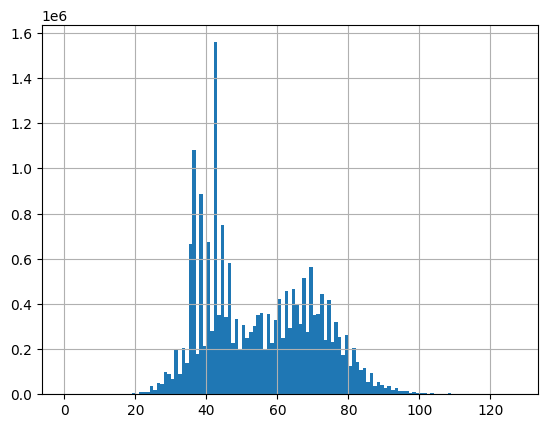

In [23]:
df['note'].hist(bins=range(0, 128))



<Axes: >

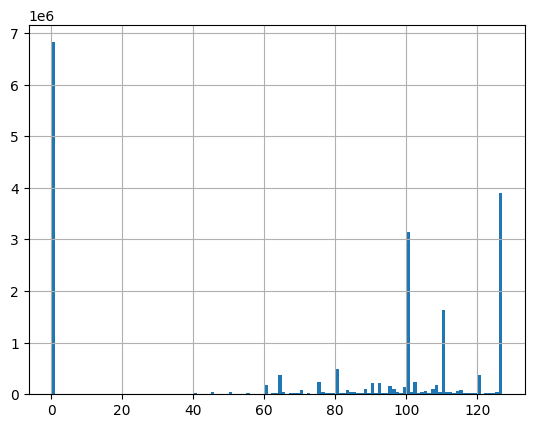

In [36]:
# Distribution of velocities
df['velocity'].hist(bins=range(0, 128))

# Check for any null values

<Axes: >

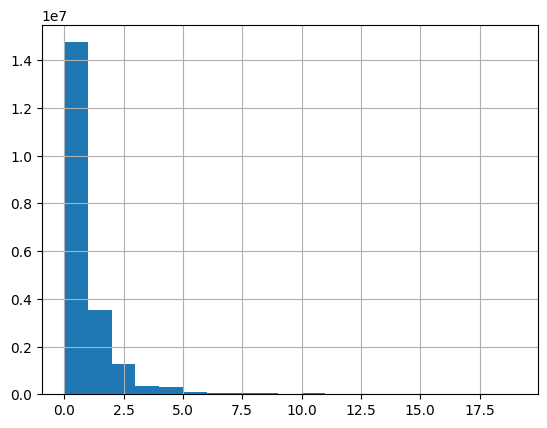

In [26]:
df['duration'].hist(bins=range(0, 20))


In [27]:
print(df.isnull().sum())


note        0
velocity    0
duration    0
dtype: int64


In [34]:
outlier_threshold = 400  # Example threshold, adjust based on your analysis
outliers = df[df['duration'] > outlier_threshold]
print(outliers.head())

Empty DataFrame
Columns: [note, velocity, duration]
Index: []


In [29]:
max_duration = 720  # Example value, e.g., 4 bars in 4/4 time at 120 ticks per beat
df['duration'] = df['duration'].clip(upper=max_duration)

<Axes: >

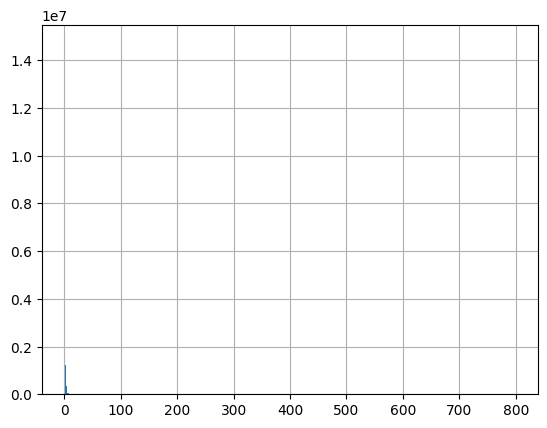

In [18]:
df['duration'].hist(bins=range(0, 800))

In [37]:
csv_data = df.to_numpy()
note_velocity_counts = pd.DataFrame(csv_data, columns=['note', 'velocity', 'duration']).groupby(['note', 'velocity']).size().reset_index(name='counts')
print(note_velocity_counts.sort_values('counts', ascending=False).head())


      note  velocity  counts
2631    42         0  507946
1865    36         0  342239
2119    38         0  296979
2758    42       127  268440
2887    44         0  253476


In [38]:
duration_counts = pd.DataFrame(csv_data, columns=['note', 'velocity', 'duration']).groupby('duration').size().reset_index(name='counts')
print(duration_counts.sort_values('counts', ascending=False).head())


   duration    counts
0         0  14755248
1         1   3521812
2         2   1289303
3         3    340206
4         4    287708
